In [15]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
import open3d as o3d
from skimage.morphology import reconstruction

In [23]:
color_image_arr = []
p = '/mnt/Data1/data/Experiments/high-res/vehicledb/target/*'
import glob as glob
for i,color_image in enumerate(glob.glob(p+'.depth.txt')):
    path = ('/').join(color_image.split('/')[:-1])
    a=color_image.split('/')[8].split('.')[0]
    print(a)
    name = a+'.jpg'  #'.'+a[1]
    print(('/').join([path,name]))
    arr = cv2.imread(('/').join([path,name]),1)
    color_image_arr.append([name,arr])
print(len(color_image_arr))

P02C025-2022081200357
/mnt/Data1/data/Experiments/high-res/vehicledb/target/P02C025-2022081200357.jpg
P02C021-2022052301329
/mnt/Data1/data/Experiments/high-res/vehicledb/target/P02C021-2022052301329.jpg
P02C020-2022051001296
/mnt/Data1/data/Experiments/high-res/vehicledb/target/P02C020-2022051001296.jpg
P02C020-2022051600485
/mnt/Data1/data/Experiments/high-res/vehicledb/target/P02C020-2022051600485.jpg
4


P02C025-2022081200357.jpg
P02C021-2022052301329.jpg
P02C020-2022051001296.jpg
P02C020-2022051600485.jpg


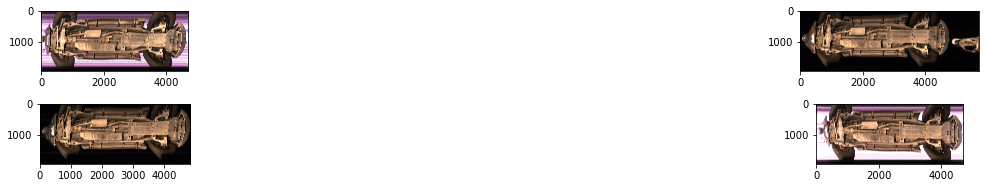

In [24]:
plt.figure(figsize=(25, 25))
for i,img in enumerate(color_image_arr):
    plt.subplot(15,2,i+1)
    plt.subplots_adjust(wspace=.25)
    plt.subplots_adjust(hspace=.55)
    print(img[0])
    rgb = cv2.cvtColor(img[1].astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)

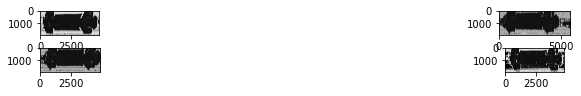

In [25]:
plt.figure(figsize=(15, 10))
for i,img in enumerate(color_image_arr):
    plt.subplot(15,2,i+1)
    plt.subplots_adjust(wspace=.25)
    plt.subplots_adjust(hspace=.55)
    
    hsv2 = cv2.cvtColor(img[1].astype(np.float32), cv2.COLOR_BGR2HSV)
    plt.imshow(hsv2[:,:,0],'gray')
 

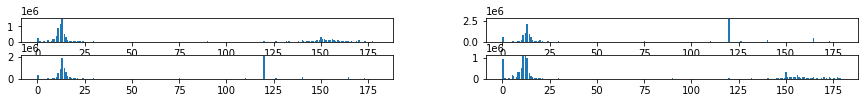

In [26]:
plt.figure(figsize=(15, 10))
for i,img in enumerate(color_image_arr):
    plt.subplot(15,2,i+1)
    plt.subplots_adjust(wspace=.25)
    plt.subplots_adjust(hspace=.55)
    
    hsv2 = cv2.cvtColor(img[1].astype(np.uint8), cv2.COLOR_BGR2HSV)[:,:,0]
    plt.hist(np.ndarray.flatten(hsv2), bins=256)

/mnt/Data1/data/Experiments/high-res/vehicledb/target/*P02C025-2022081200357.jpg_huemask.jpg
img:  (9070080, 3)
/mnt/Data1/data/Experiments/high-res/vehicledb/target/*P02C021-2022052301329.jpg_huemask.jpg
img:  (11001600, 3)
/mnt/Data1/data/Experiments/high-res/vehicledb/target/*P02C020-2022051001296.jpg_huemask.jpg
img:  (9250560, 3)
/mnt/Data1/data/Experiments/high-res/vehicledb/target/*P02C020-2022051600485.jpg_huemask.jpg
img:  (9064320, 3)


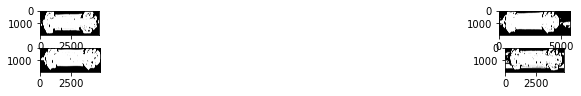

In [27]:
plt.figure(figsize=(15, 10))
path = p
for i,img in enumerate(color_image_arr):
    plt.subplot(15,2,i+1)
    plt.subplots_adjust(wspace=.25)
    plt.subplots_adjust(hspace=.55)
    
    name = img[0].split('.')[0]+'.'+img[0].split('.')[1]
    image = ('/').join([path,name,'.jpg'])
    
    H = cv2.cvtColor(img[1].astype(np.uint8), cv2.COLOR_BGR2HSV)[:,:,0]
    kernel = np.ones((4,4),np.uint8)
    lower = np.array([0])
    upper = np.array([35])

    mask = cv2.inRange(H, lower, upper)
    opening =  cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=12)
    closing =  cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=18)
    print(path+name+'_huemask.jpg')
    print("img: ",img[1].reshape(-1,3).shape)
    cv2.imwrite(path+name+'_huemask.jpg',closing)
    plt.imshow(opening,"gray")

In [28]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=.25)
plt.subplots_adjust(hspace=.15)
for i,img_file in enumerate(glob.glob(p+'*_huemask.jpg')):
    print(img_file)
    name = img_file.split('/')[8].split('.')[0]+'.'+img_file.split('/')[8].split('.')[1]
    print(name)
    
    img = cv2.imread(img_file,0)
    print("img: ",img.reshape(-1,).shape)
    mask3 = np.zeros((img.shape))
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    max_area = 0
    best_cnt = None
    ar = np.array([(cv2.contourArea(counter),counter) for counter in contours])
    max_area=max(ar[:,0])
    index = np.where(ar[:,0] == max_area)[0]
    best_cnt = ar[:,1][index[0]]
    kernel =  np.ones((25,25),np.uint8)
    cv2.drawContours(mask3, [best_cnt], 0, (255,255,255), cv2.FILLED )
    print("name: ",name+'_FillMask.jpg')
    print("mask: ",mask3.reshape(-1,).shape)
    cv2.imwrite(p+name+'_FillMask.jpg',mask3)
    

/mnt/Data1/data/Experiments/high-res/vehicledb/target/P02C025-2022081200357.jpg_huemask.jpg
P02C025-2022081200357.jpg_huemask
img:  (9070080,)
name:  P02C025-2022081200357.jpg_huemask_FillMask.jpg
mask:  (9070080,)
/mnt/Data1/data/Experiments/high-res/vehicledb/target/P02C020-2022051001296.jpg_huemask.jpg
P02C020-2022051001296.jpg_huemask
img:  (9250560,)
name:  P02C020-2022051001296.jpg_huemask_FillMask.jpg
mask:  (9250560,)
/mnt/Data1/data/Experiments/high-res/vehicledb/target/P02C021-2022052301329.jpg_huemask.jpg
P02C021-2022052301329.jpg_huemask
img:  (11001600,)
name:  P02C021-2022052301329.jpg_huemask_FillMask.jpg
mask:  (11001600,)
/mnt/Data1/data/Experiments/high-res/vehicledb/target/P02C020-2022051600485.jpg_huemask.jpg
P02C020-2022051600485.jpg_huemask
img:  (9064320,)
name:  P02C020-2022051600485.jpg_huemask_FillMask.jpg
mask:  (9064320,)


<Figure size 1080x720 with 0 Axes>

In [166]:
def calculate():
        """
        Summary.
        Calculate closed point distance between the reference and target point cloud data.
        Parameters:
        target (point cloud): Target point cloud data after removal of outliers
        Returns:
        distance_array: Distance object storing pointwise values from the target 
        to the reference point cloud using closest point distance function in open3d
        """
        FILENAME_1='/mnt/Data1/data/Experiments/objectTesting/warpeddepth/LOGP01C016-2022072600737.depth.txt'
        FILENAME_2='/mnt/Data1/data/Experiments/objectTesting/warpeddepth/Maruti_Suzuki_Dzire.depth.txt'
        
        pcd_1 = o3d.io.read_point_cloud(FILENAME_1,'xyz')
        pcd_2 = o3d.io.read_point_cloud(FILENAME_2,'xyz')
        pcd_1_depth = np.array(pcd_1.points)[:,2]
        pcd_2_depth = np.array(pcd_2.points)[:,2]
        distance_array_wrt_1 = np.abs(pcd_1_depth - pcd_2_depth)
        distance_array_wrt_2 = distance_array_wrt_1
      #  distance_array_wrt_1 = pcd_1.compute_point_cloud_distance(pcd_2)
      #  distance_array_wrt_2 = pcd_2.compute_point_cloud_distance(pcd_1)
       
        return distance_array_wrt_1,distance_array_wrt_2,pcd_1,pcd_2
        
def save_distances( distance_array, target_pcd):
    """
    Summary.
    Creation of heatmap for the distances calculated to 
    the closest points in the deformed reference point cloud data with respect 
    to the target point cloud.
    Parameters:
    distance_array (array): Distance object storing pointwise values from the target 
    to the reference point cloud using closest point distance function in open3d
    target_pcd (point cloud): Target point cloud data after removal of outliers
    target_shape (tuple): Shape of target image
    Returns:
    distance_image_normalised: Description of return value
    cmap: cmap 
    """
    

    distance_image = np.zeros((1000,1600,3), np.uint8)
    # distance_image = self.img #np.zeros([target_shape[0],target_shape[1]], dtype = float)
    target_points= np.array(target_pcd.points)

    for i in range(len(target_pcd.points)):
        dist_array_val = np.float32(distance_array[i])
        if dist_array_val < 0:
            val = (255,255, 255)
        elif dist_array_val >= 0  and dist_array_val < 5:
            val = (0, 0, 0) # Black
        elif dist_array_val >= 5  and dist_array_val < 10:
            val =  (0, 255, 0) # Green
        elif dist_array_val >= 10  and dist_array_val < 20:
            val = (153, 255, 255) # yellow
        elif dist_array_val >= 20  and dist_array_val < 30:
            val =  (0, 255, 255)  # yellow
        elif dist_array_val >= 30  and dist_array_val < 40:
            val =  (204, 153, 255) # pink
        elif dist_array_val >= 40  and dist_array_val < 50:
            val =  (0, 0, 255) # red
        elif dist_array_val >= 50:
            val = (0, 0, 255) # red
        distance_image[int(target_points[i][0]),int(target_points[i][1])] = val

    return distance_image


    

In [6]:

one,two,pcd_1,pcd_2 =calculate()
print(len(two))
print(len(one))

1600000
1600000


In [7]:
im=save_distances( one, pcd_1)

In [8]:
np.min(np.array(one)),np.max(np.array(one))

(0.0, 2999.0)

In [9]:
np.min(np.array(two)),np.max(np.array(two))

(0.0, 2999.0)

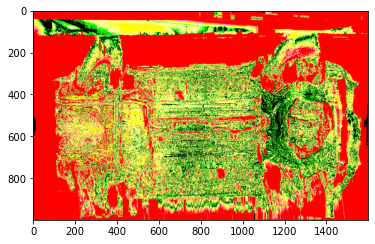

In [10]:
img_left_color_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB).astype(np.uint8)
plt.imshow(img_left_color_img)

In [11]:
im=save_distances( two, pcd_2)

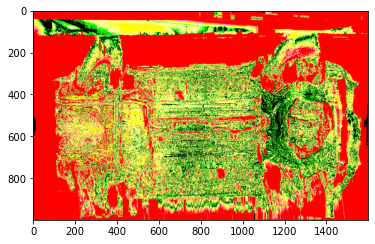

In [13]:
img_left_color_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB).astype(np.uint8)
plt.imshow(img_left_color_img)